<a href="https://colab.research.google.com/github/khushimusterya/Prodigytech_task1/blob/main/prodigytask_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Khushi Musterya  
Task : 5

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

Data is selected from kaggle.com (Road Accident Casualties Dataset)

In [1]:
#Importing all the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
accident_data = pd.read_csv("/content/accident data.csv")

In [4]:
accident_data.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1.0,2.0,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1.0,2.0,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1.0,3.0,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1.0,4.0,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1.0,2.0,Dry,NaN,Urban,NaN,Other vehicle


In [5]:
#checking the shape of the data
accident_data.shape

(134719, 14)

In [6]:
#Displaying the columns of the dataset
accident_data.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [7]:
#Displaying the data type of the columns in the dataset
accident_data.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties       float64
Number_of_Vehicles         float64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object


Data Cleaning And Preparations

In [19]:
#Check for missing values:
accident_data.isnull().sum()

Index                         0
Accident_Severity             0
Accident Date                 0
Latitude                      0
Light_Conditions              0
District Area                 0
Longitude                     1
Number_of_Casualties          1
Number_of_Vehicles            1
Road_Surface_Conditions     183
Road_Type                  1014
Urban_or_Rural_Area           1
Weather_Conditions         2959
Vehicle_Type                  1
dtype: int64

In [20]:
#Handle missing values:
accident_data.dropna(inplace=True)

In [22]:
#Check for duplicates:
accident_data.duplicated().sum()

2

In [23]:
#Remove duplicates:
accident_data.drop_duplicates(inplace=True)

In [24]:
accident_data.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,131038.000000,131038.000000,131038.000000,131038.000000
mean,52.620531,-1.118962,1.367909,1.849555
std,1.058137,1.038322,0.851448,0.714427
min,50.584932,-3.599412,1.000000,1.000000
25%,51.577498,-1.903816,1.000000,1.000000
50%,52.541657,-1.208042,1.000000,2.000000
75%,53.474698,-0.222028,1.000000,2.000000
max,55.785544,1.756307,68.000000,16.000000


In [25]:
#Check for data types:
accident_data.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties              float64
Number_of_Vehicles                float64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object


Exploratory Data Analysis(EDA)

array([[<Axes: title={'center': 'Accident Date'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Number_of_Casualties'}>],
       [<Axes: title={'center': 'Number_of_Vehicles'}>, <Axes: >]],
      dtype=object)

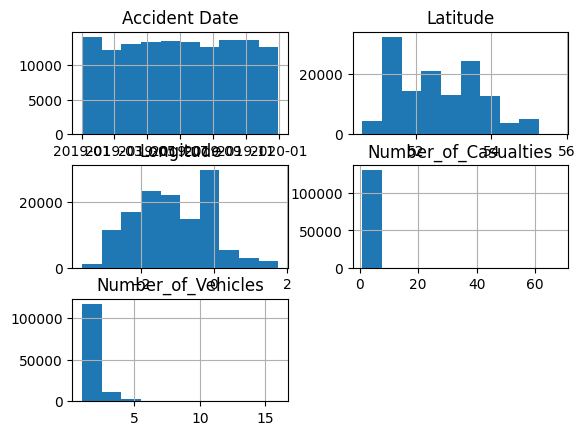

In [27]:
accident_data.hist()

In [15]:
accident_data['Accident Date'] = pd.to_datetime(accident_data['Accident Date'])

<ipython-input-15-c71f7141033e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  accident_data['Accident Date'] = pd.to_datetime(accident_data['Accident Date'])


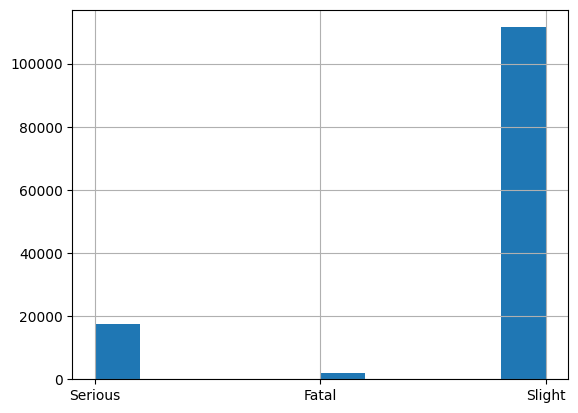

In [33]:
# Univariate analysis
accident_data['Accident_Severity'].hist()
plt.show()

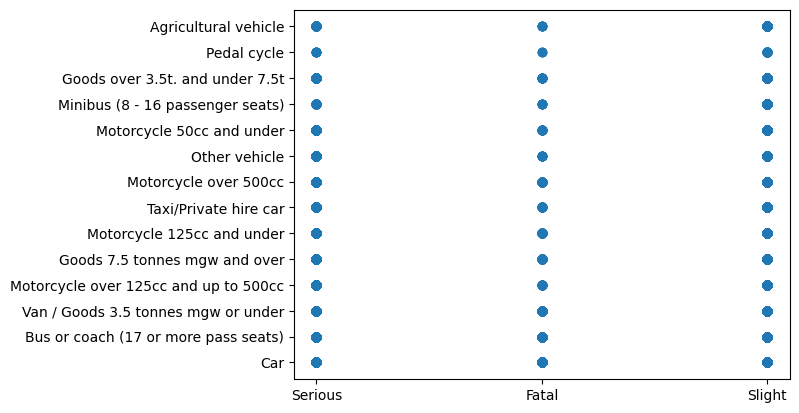

In [34]:
# Bivariate analysis
plt.scatter(accident_data['Accident_Severity'], accident_data['Vehicle_Type'])
plt.show()

<ipython-input-35-95a99f0f4ac6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(accident_data.corr(), annot=True)


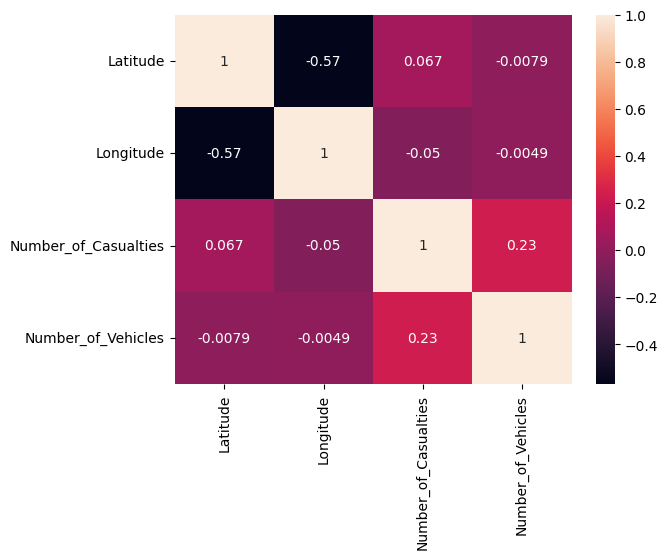

In [35]:
# Multivariate analysis
sns.heatmap(accident_data.corr(), annot=True)
plt.show()

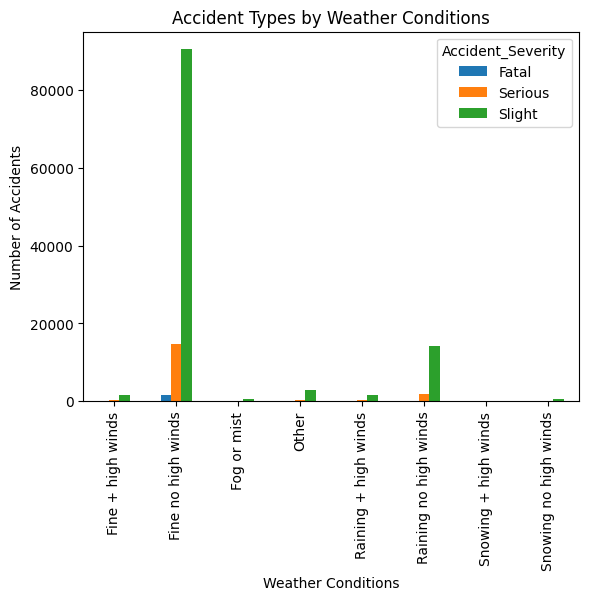

In [41]:
# Find the most common accident types by weather conditions
accident_data.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack().plot(kind='bar')
plt.title('Accident Types by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()

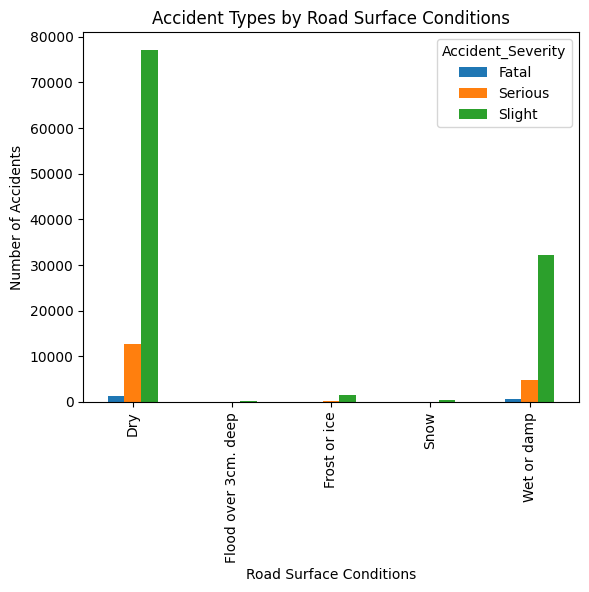

In [43]:
# Create a bar chart of accidents by road surface conditions
accident_data.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts().unstack().plot(kind='bar')
plt.title('Accident Types by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.show()

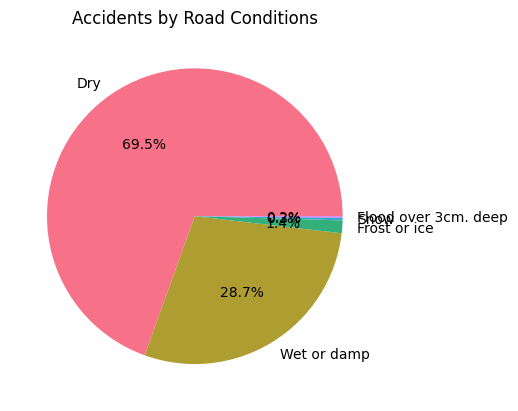

In [44]:
# Create a pie chart of accidents by road conditions
labels = accident_data['Road_Surface_Conditions'].value_counts().index.to_list()
sizes = accident_data['Road_Surface_Conditions'].value_counts().to_list()
colors = sns.color_palette('husl', len(labels))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Accidents by Road Conditions')
plt.show()

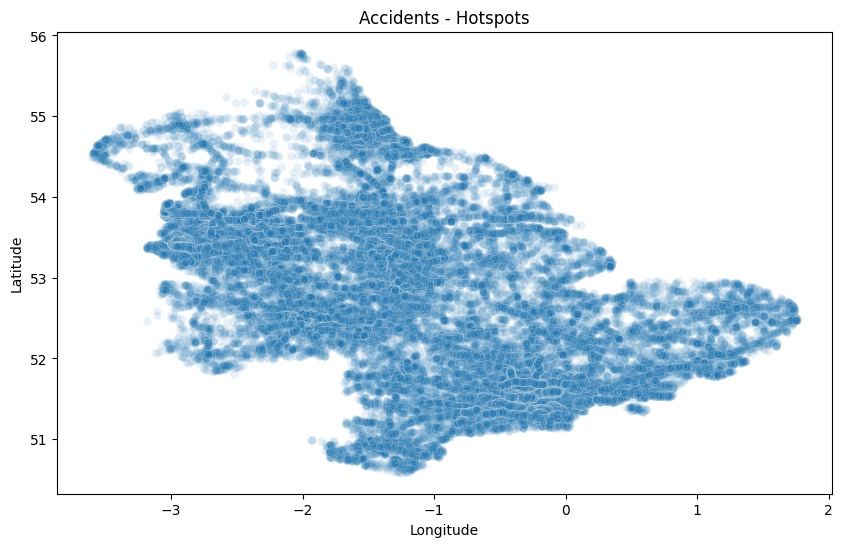

In [45]:
#Performing Spatial Analysis and Scatter plot of accident locations
plt.figure(figsize=(10,6))
sns.scatterplot(x ="Longitude", y = "Latitude", data=accident_data, alpha = 0.1)
plt.title("Accidents - Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()